In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [137]:
data = pd.read_csv("C:\\Users\\PAWAN\\Downloads\\train.csv")
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [138]:
data.shape

(1000, 12)

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


In [140]:
data.isnull().sum()

v.id             0
on road old      0
on road now      0
years            0
km               0
rating           0
condition        0
economy          0
top speed        0
hp               0
torque           0
current price    0
dtype: int64

In [141]:
data.columns

Index(['v.id', 'on road old', 'on road now', 'years', 'km', 'rating',
       'condition', 'economy', 'top speed', 'hp', 'torque', 'current price'],
      dtype='object')

In [142]:
pair_plot = data[['years', 'km', 'rating',
       'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']].corr()

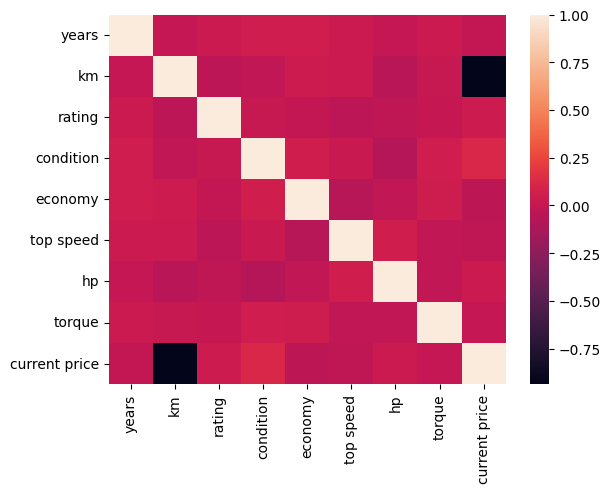

In [143]:
sns.heatmap(pair_plot)
plt.show()

In [201]:
tensor_data = tf.constant(data, dtype= tf.dtypes.float32)
tensor_data = tf.random.shuffle(tensor_data)

In [202]:
print(tensor_data)

tf.Tensor(
[[5.010000e+02 5.543820e+05 7.658410e+05 ... 8.700000e+01 1.040000e+02
  1.909565e+05]
 [4.730000e+02 5.083700e+05 8.621880e+05 ... 9.900000e+01 1.140000e+02
  5.016625e+05]
 [2.010000e+02 6.624540e+05 8.226250e+05 ... 5.200000e+01 1.200000e+02
  1.596145e+05]
 ...
 [2.630000e+02 6.414770e+05 7.124850e+05 ... 6.800000e+01 1.080000e+02
  9.446750e+04]
 [7.610000e+02 5.115500e+05 7.505050e+05 ... 5.400000e+01 8.900000e+01
  1.565130e+05]
 [6.740000e+02 6.878190e+05 8.158960e+05 ... 7.400000e+01 1.100000e+02
  5.173660e+05]], shape=(1000, 12), dtype=float32)


In [203]:
y=tensor_data[:,-1]
x=tensor_data[:,3:-1]


In [204]:
train_size = len(data) * 0.8
test_size = len(data) * 0.1
val_size = len(data) * 0.1

train_size,test_size,val_size

(800.0, 100.0, 100.0)

In [225]:
x_train = tf.cast(x[:int(train_size)],tf.float32)
x_test=tf.cast(x[int(train_size):int(train_size)+int(test_size)],tf.float32)
x_val = tf.cast(x[int(train_size) + int(test_size):],tf.float32)


len(x_train), len(x_test), len(x_val)

(800, 100, 100)

In [226]:
y_train = tf.cast(y[:int(train_size)],tf.float32)
y_test=tf.cast(y[int(train_size):int(train_size)+int(test_size)],tf.float32)
y_val = tf.cast(y[int(train_size) + int(test_size):],tf.float32)


len(y_train), len(y_test), len(y_val)

(800, 100, 100)

In [227]:
print(np.isinf(x).sum())
print(np.isinf(y).sum())

0
0


In [228]:
from tensorflow.keras.layers import Normalization

normalizer = Normalization(input_shape=(8,))

normalizer.adapt(x_train)

c:\Users\PAWAN\anaconda3\envs\project\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [229]:
from keras.models import Sequential
from keras.layers import Dense, InputLayer,Dropout

In [230]:
# model= Sequential([
    
#     InputLayer(input_shape=(8,)),
#     normalizer,
#     Dense(128,activation="relu"),
#     Dense(64,activation="relu"),
#     Dense(32,activation="relu"),
#     Dense(16,activation="relu"),
#     Dense(1)
    
# ])

model= Sequential([
    
    InputLayer(input_shape=(8,)),
    normalizer,
    Dense(64,activation="relu"),
    Dense(32,activation="relu"),
    Dense(64,activation="relu"),
    Dense(1)
    
])

c:\Users\PAWAN\anaconda3\envs\project\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [231]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_9 (Normalization) │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,850 (18.95 KB)

 Trainable params: 4,833 (18.88 KB)

 Non-trainable params: 17 (72.00 B)

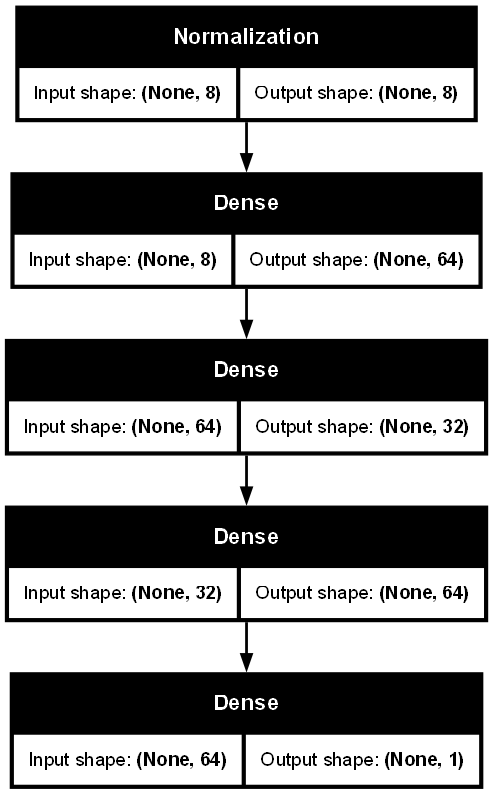

In [232]:
from keras.utils import plot_model

plot_model(model, to_file="model.png",show_shapes=True,dpi=100)

In [233]:
from keras.optimizers import Adam
from keras.metrics import MeanAbsoluteError as MAE
from keras.metrics import MeanSquaredError as MSE

In [234]:
model.compile(optimizer=Adam(learning_rate=0.1),loss="MSE",metrics=[MAE])

In [235]:
history = model.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=64,epochs=200,verbose=1)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 108354011136.0000 - mean_absolute_error: 305271.4375 - val_loss: 41913057280.0000 - val_mean_absolute_error: 181969.0781
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 21341759488.0000 - mean_absolute_error: 119033.5469 - val_loss: 11083875328.0000 - val_mean_absolute_error: 90257.6797
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8499478528.0000 - mean_absolute_error: 78467.6328 - val_loss: 3463782656.0000 - val_mean_absolute_error: 46271.8633
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3004255488.0000 - mean_absolute_error: 43737.1523 - val_loss: 2541349120.0000 - val_mean_absolute_error: 39150.0547
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2518142720.0000 - mean_absolute_error: 40615.6836 - val_loss: 2269270272.0000 - val_mean_absolute_error: 40364.9297
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2153616384.0000 - mean_absolute_error: 37981.4805 - 

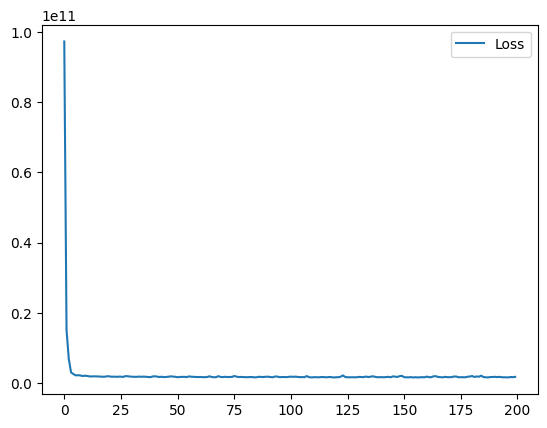

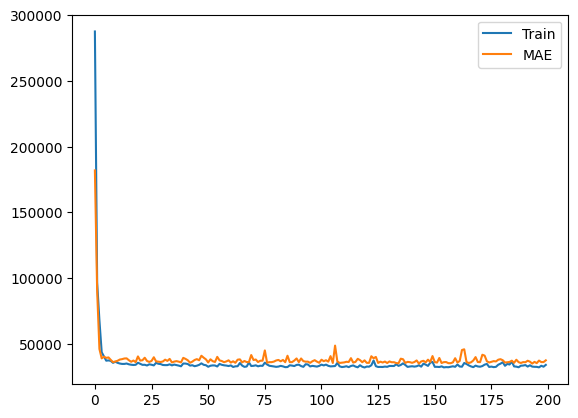

In [236]:
plt.plot(history.history["loss"])
plt.legend(["Loss"])
plt.show()

plt.plot(history.history["mean_absolute_error"])
plt.plot(history.history["val_mean_absolute_error"])
plt.legend(["Train","MAE"])
plt.show()

In [237]:
print(model.evaluate(x_test,y_test))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2303680768.0000 - mean_absolute_error: 40426.4609
[2405018624.0, 41094.75390625]


In [238]:
y_predicted = model.predict(x_test)
print(y_predicted[1],y_test[1])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[230527.58] tf.Tensor(275670.0, shape=(), dtype=float32)
